<a href="https://colab.research.google.com/github/FaiqaRashid99/Artifical_intelligence-and-DataAnalytics/blob/main/AICP_task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [77]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Drive

In [78]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [99]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/births.csv')

In [100]:
df

year  month  day gender  births
0      1969      1  1.0      F    4046
1      1969      1  1.0      M    4440
2      1969      1  2.0      F    4454
3      1969      1  2.0      M    4548
4      1969      1  3.0      F    4548
...     ...    ...  ...    ...     ...
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235

[15547 rows x 5 columns]

**Q.1: Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc**

In [101]:
df['Decade'] = df['year'].apply(lambda x: 10 * (x // 10))
df

year  month  day gender  births  Decade
0      1969      1  1.0      F    4046    1960
1      1969      1  1.0      M    4440    1960
2      1969      1  2.0      F    4454    1960
3      1969      1  2.0      M    4548    1960
4      1969      1  3.0      F    4548    1960
...     ...    ...  ...    ...     ...     ...
15542  2008     10  NaN      M  183219    2000
15543  2008     11  NaN      F  158939    2000
15544  2008     11  NaN      M  165468    2000
15545  2008     12  NaN      F  173215    2000
15546  2008     12  NaN      M  181235    2000

[15547 rows x 6 columns]

**Q.2: Show the descriptive statistics of the data**

In [102]:
df.describe()

year         month           day         births        Decade
count  15547.000000  15547.000000  15067.000000   15547.000000  15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561   1974.544285
std        6.728340      3.449632     15.284034   28552.465810      6.789583
min     1969.000000      1.000000      1.000000       1.000000   1960.000000
25%     1974.000000      4.000000      8.000000    4358.000000   1970.000000
50%     1979.000000      7.000000     16.000000    4814.000000   1970.000000
75%     1984.000000     10.000000     24.000000    5289.500000   1980.000000
max     2008.000000     12.000000     99.000000  199622.000000   2000.000000

**Q.3: Check if your data contains any missing values**

In [103]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

**Q.4: What is the trend of male & female births every decade?**

In [104]:
trend= df.groupby(['Decade', 'gender'])['births'].sum().unstack()
trend

gender         F         M
Decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428

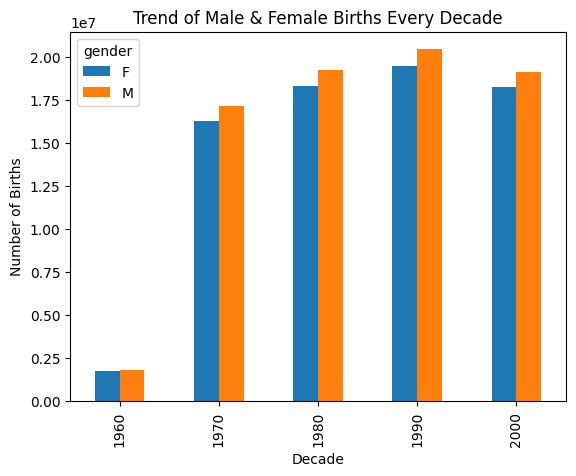

In [105]:
trend.plot(kind='bar')
plt.title('Trend of Male & Female Births Every Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Births')
plt.show()

 **Q.5: To remove outliers from dataset following techinque to include only those values that fall within 5 standard deviations from the mean. This is a common statistical technique used to focus on the central tendency of the data while excluding extreme values.**

In [107]:
# threshold given = 5
mean = df['births'].mean()
std = df['births'].std()
df = df[(df['births'] >= mean - 5 * std) & (df['births'] <= mean + 5 * std)]
df

year  month   day gender  births  Decade
0      1969      1   1.0      F    4046    1960
1      1969      1   1.0      M    4440    1960
2      1969      1   2.0      F    4454    1960
3      1969      1   2.0      M    4548    1960
4      1969      1   3.0      F    4548    1960
...     ...    ...   ...    ...     ...     ...
15062  1988     12  29.0      M    5944    1980
15063  1988     12  30.0      F    5742    1980
15064  1988     12  30.0      M    6095    1980
15065  1988     12  31.0      F    4435    1980
15066  1988     12  31.0      M    4698    1980

[15067 rows x 6 columns]

**Q.6: Plot births by weekday for several decades. Write down your observation**

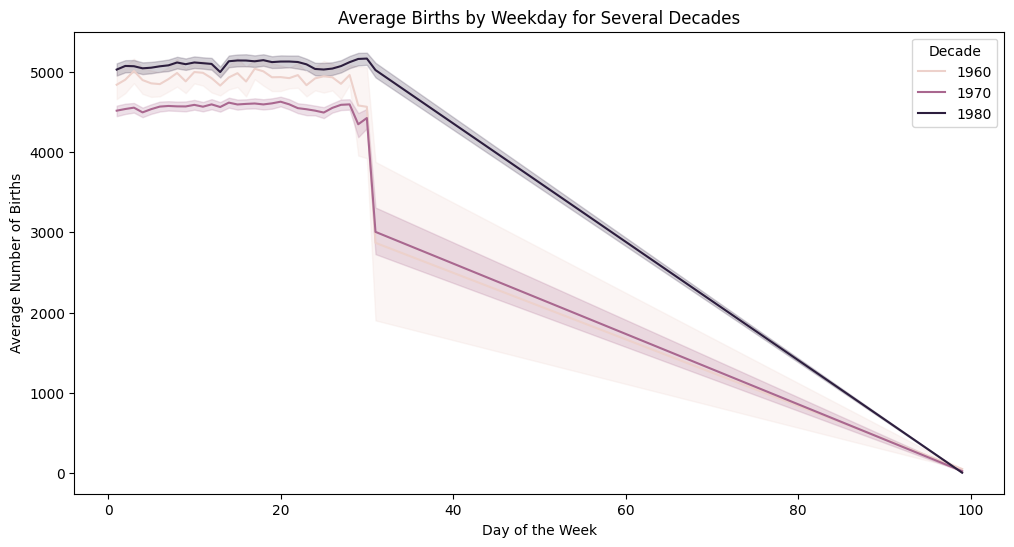

In [108]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='births', data=df, hue='Decade')
plt.title('Average Births by Weekday for Several Decades')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Births')
plt.legend(title='Decade')
# plt.xticks(np.arange(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Observation:
- There is a general upward trend in the number of births over time, with the highest number of births occurring in the 1980s and 1990s.
- The distribution of births by weekday is relatively consistent across decades,but Sunday has the lowest number of births,
- There is a noticeable increase in births on Tuesday.


**Q7: Group the data by month and day separately**

In [110]:
grouped_month = df.groupby('month')['births'].mean()
grouped_day = df.groupby('day')['births'].mean()

**Q.8: Focusing on the month and day only, you have a time series reflecting the average number of births by date of the year. From this, plot the data**

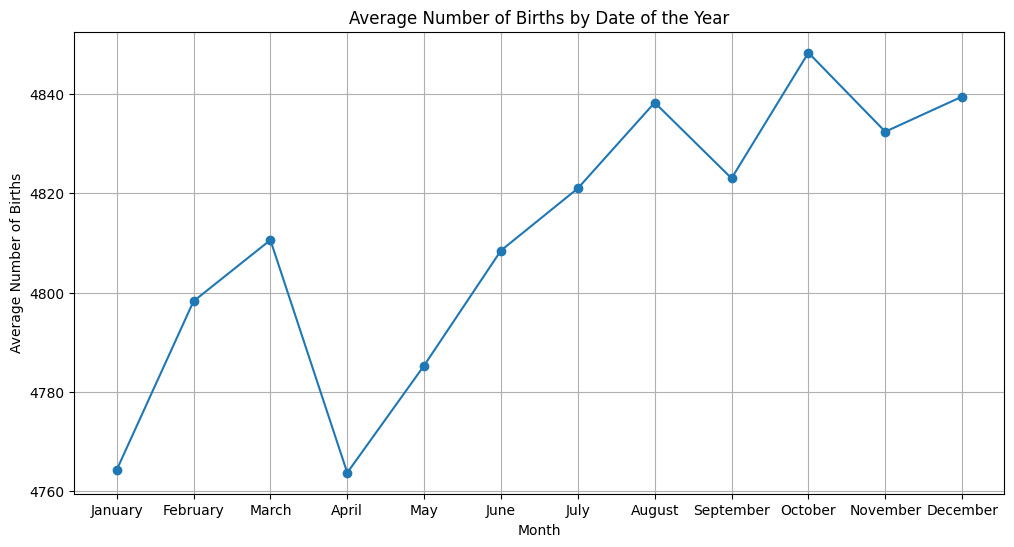

In [111]:
# Convert grouped_month to a DataFrame
grouped_month_df = grouped_month.reset_index()
grouped_month_df.rename(columns={'month': 'Month', 'births': 'Avg_Births_Month'}, inplace=True)

# Merge grouped_month_df and grouped_day_df
combined_data = grouped_month_df.merge(grouped_day, left_on='Month', right_on='day')

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Month'], combined_data['births'], marker='o', linestyle='-')
plt.title('Average Number of Births by Date of the Year')
plt.xlabel('Month')
plt.ylabel('Average Number of Births')
plt.grid(True)
plt.xticks(np.arange(1, 13), calendar.month_name[1:13])  # Setting month names as x-axis ticks
plt.show()


**year by year plotting:**

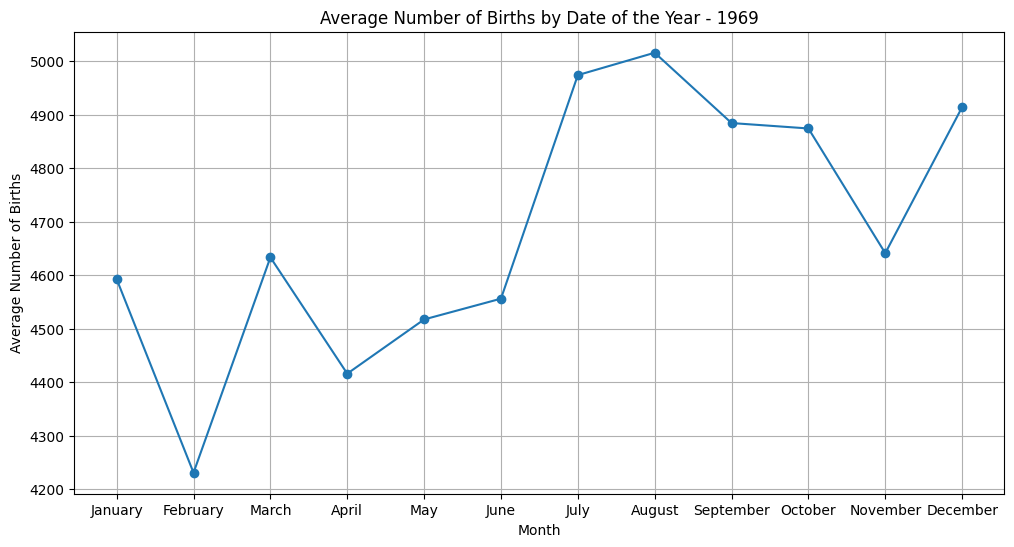

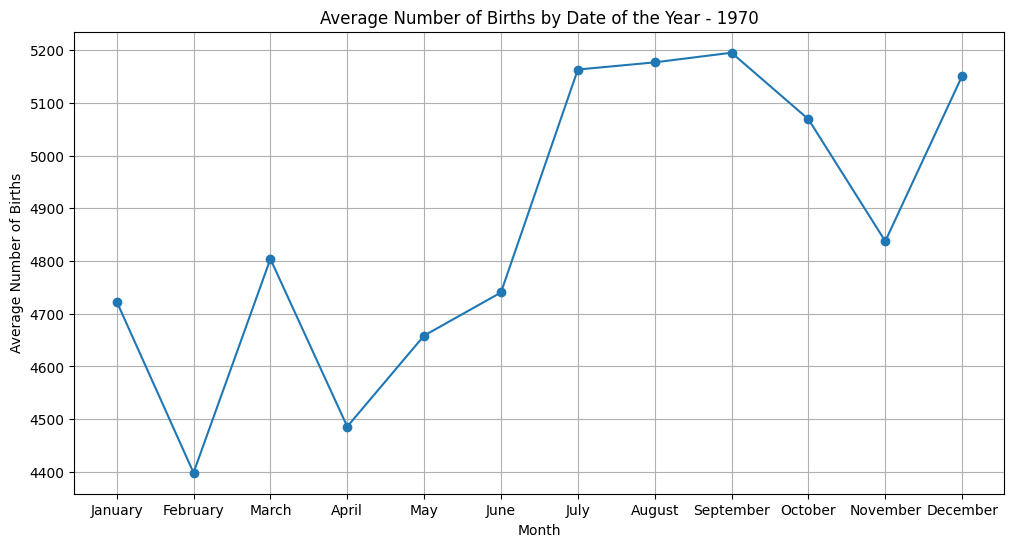

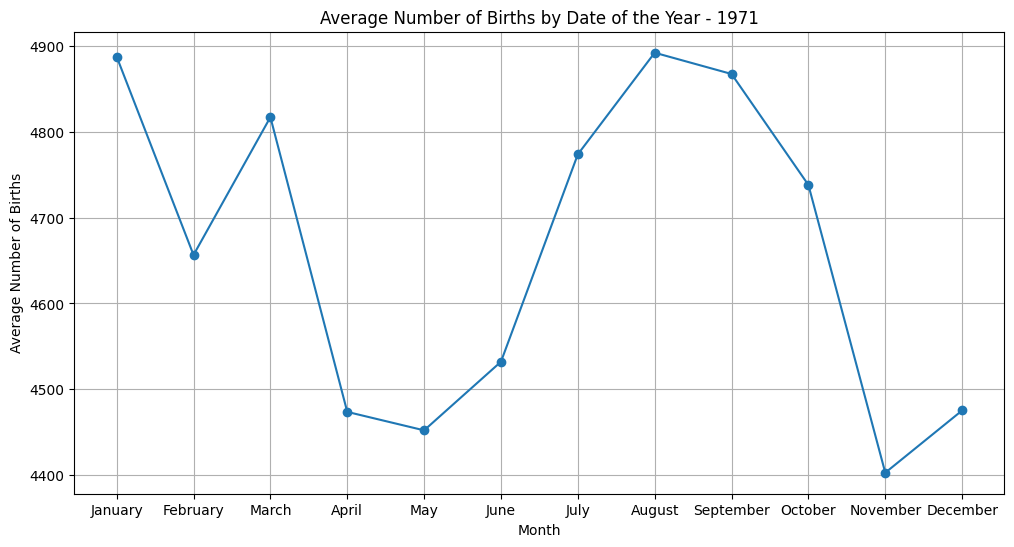

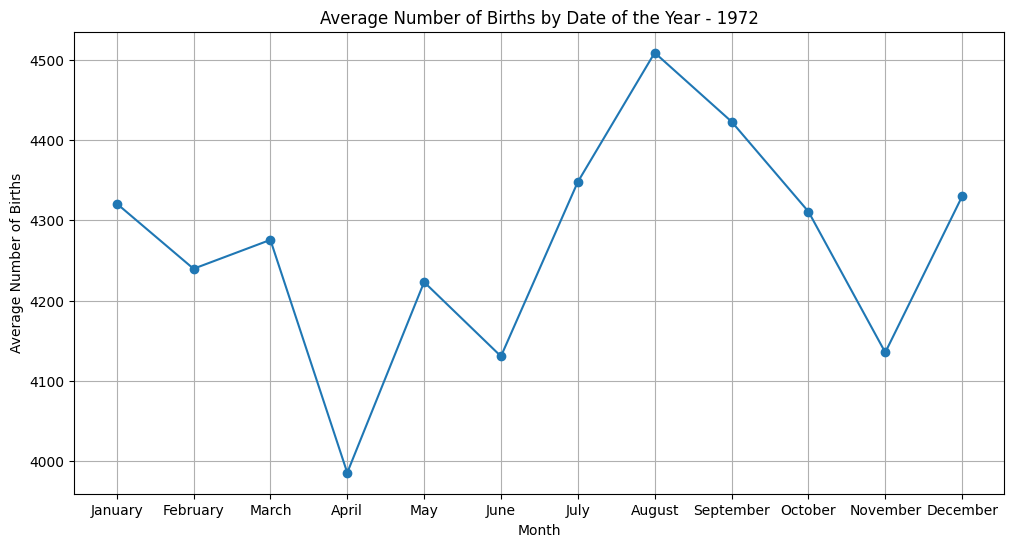

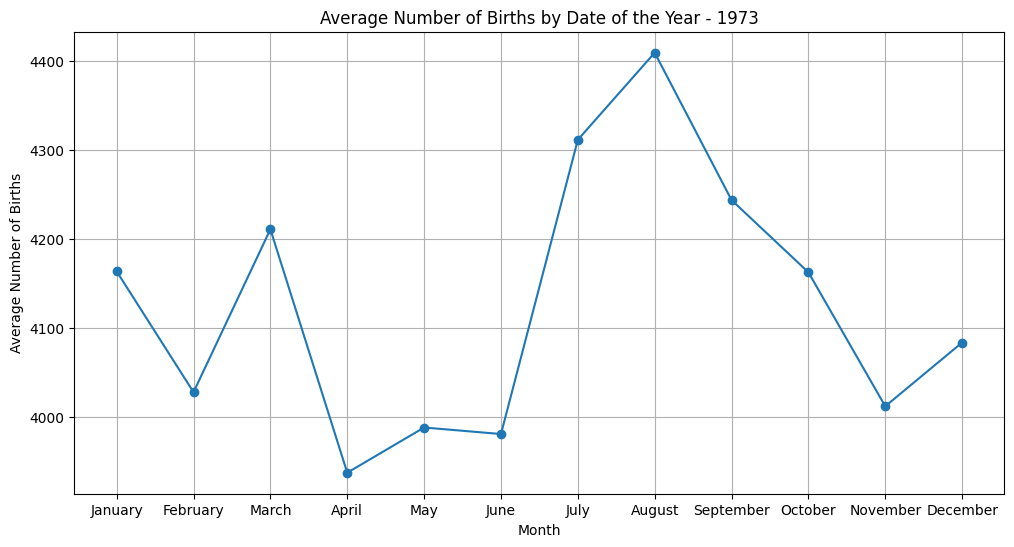

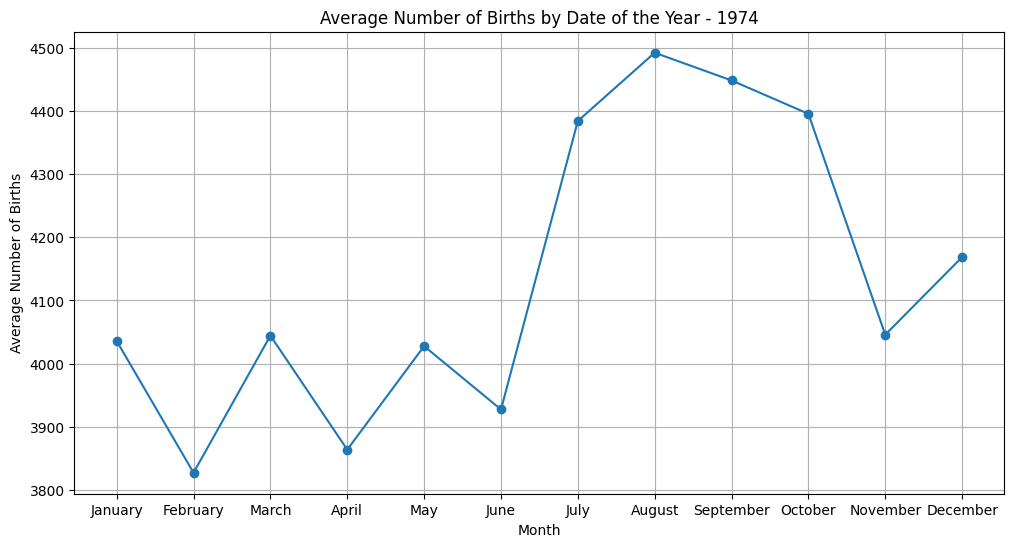

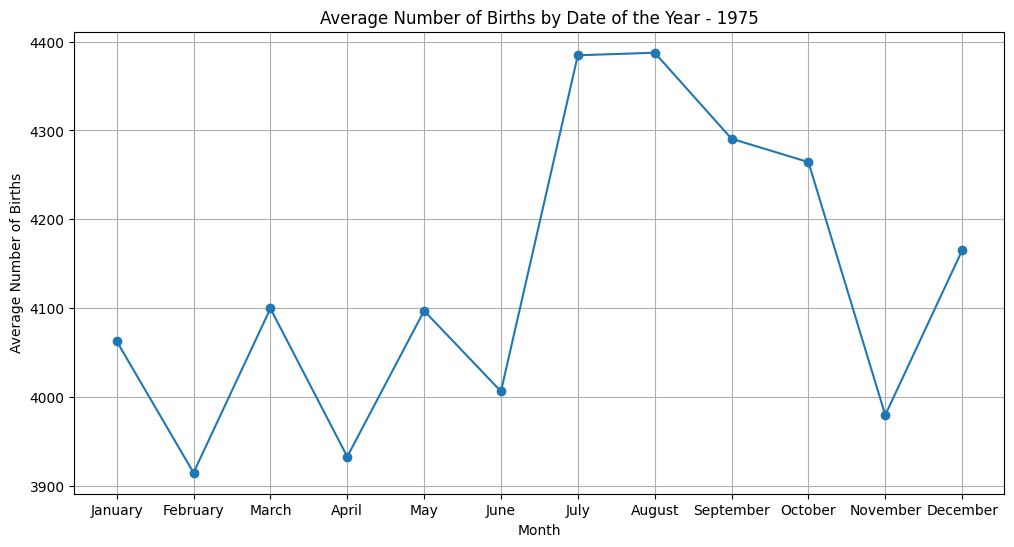

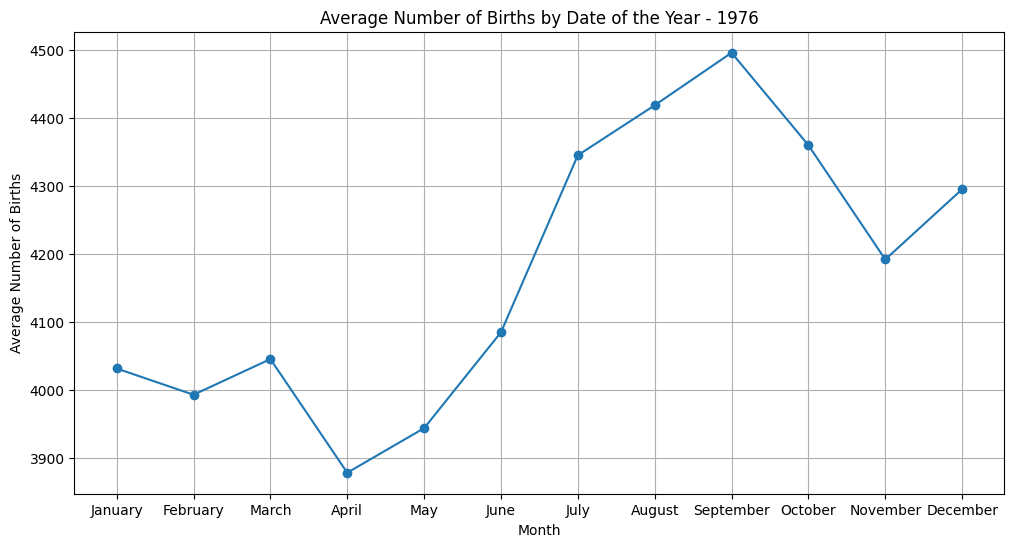

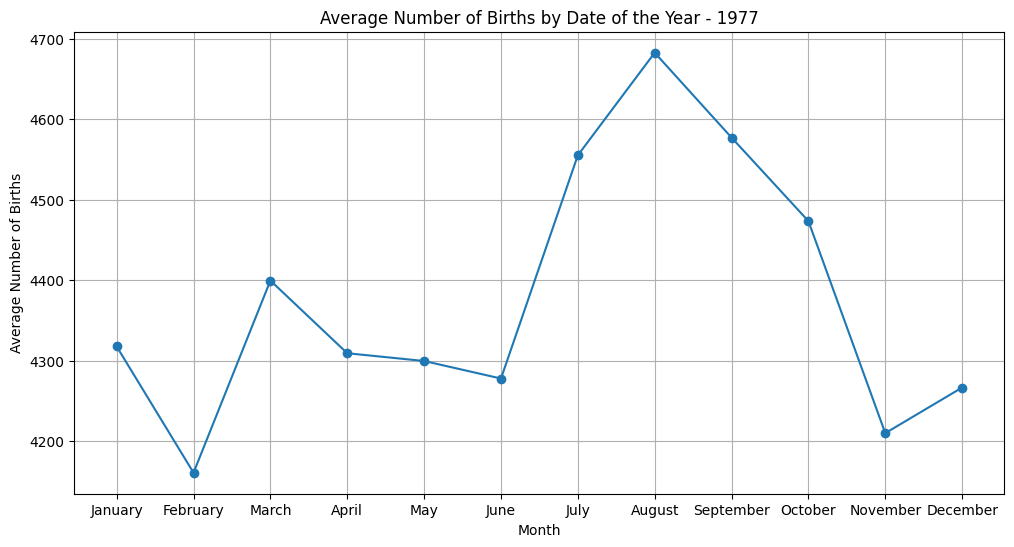

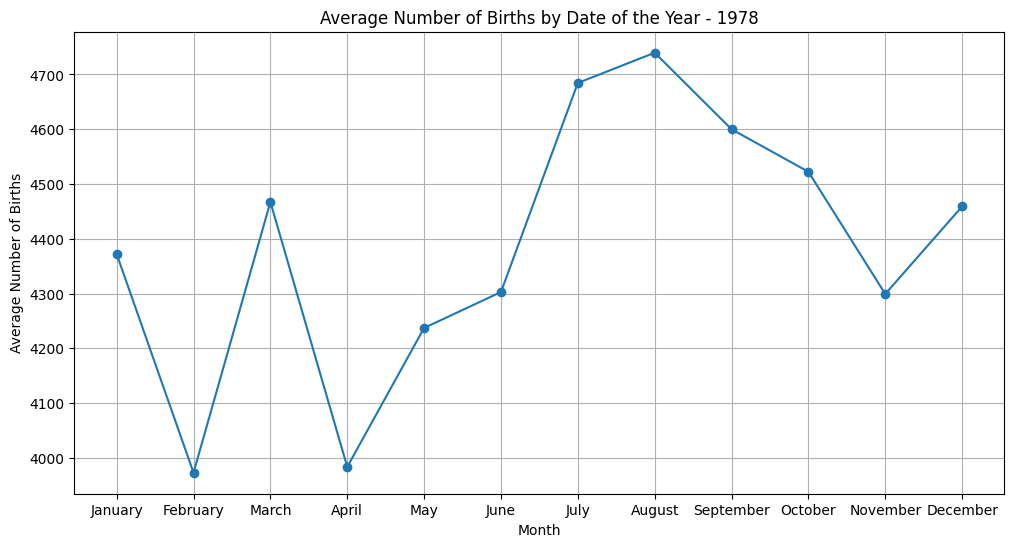

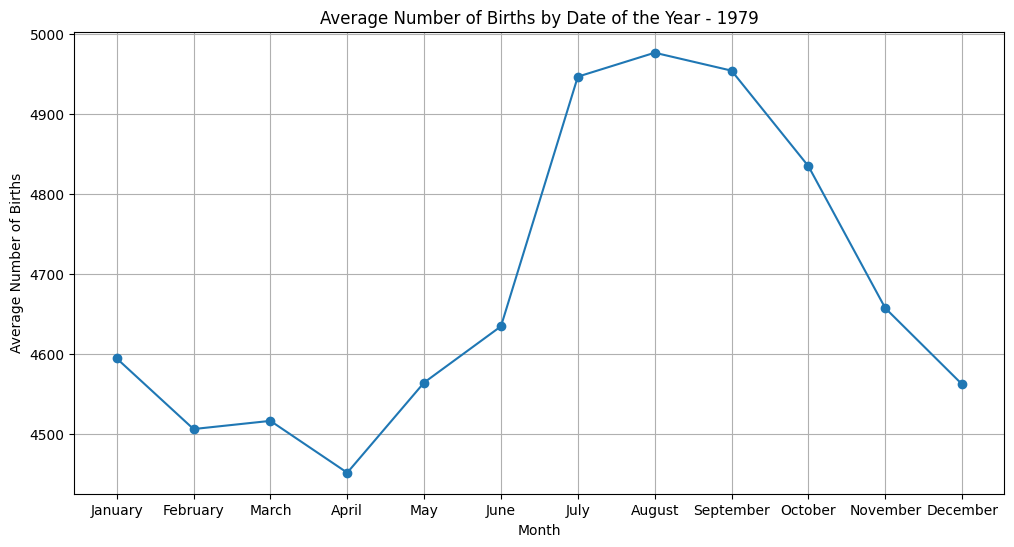

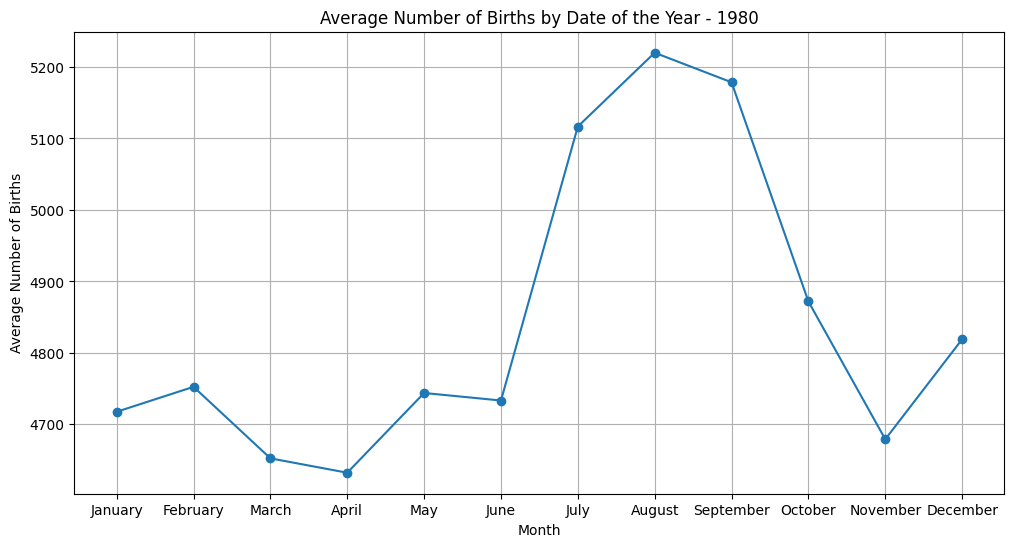

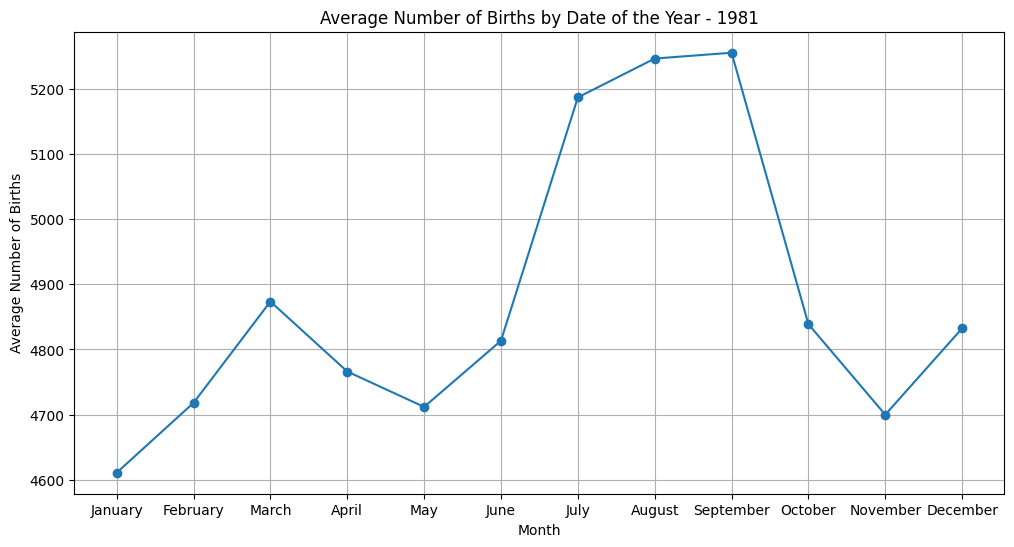

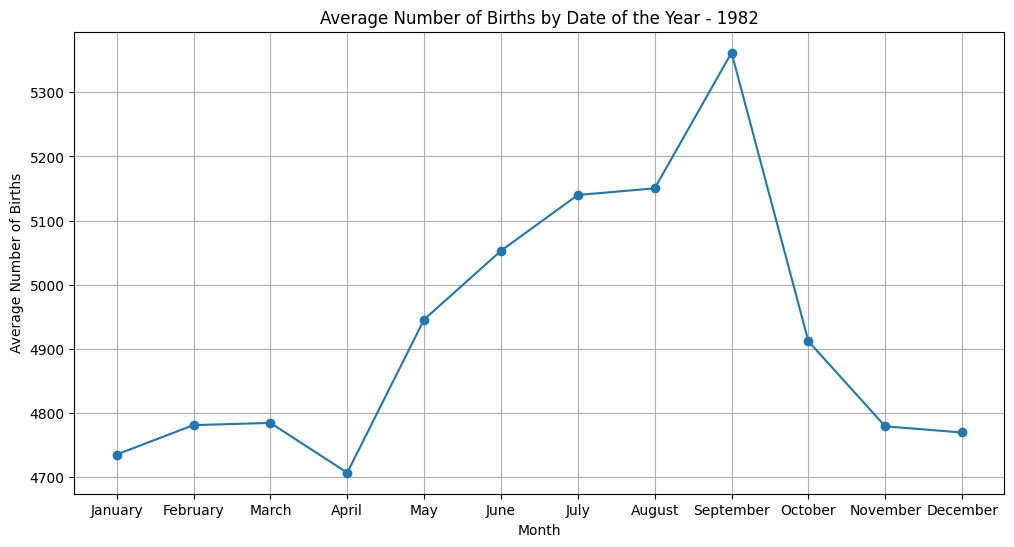

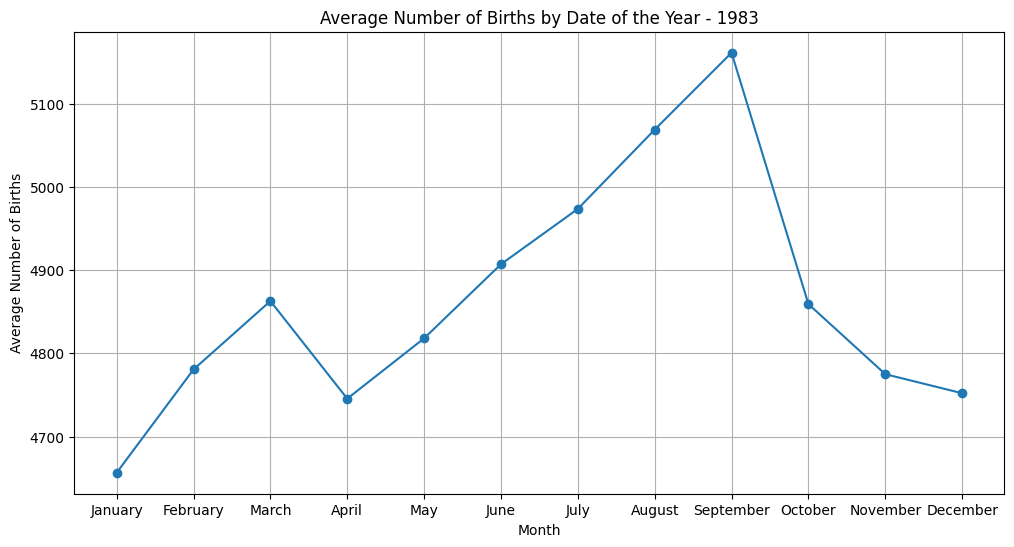

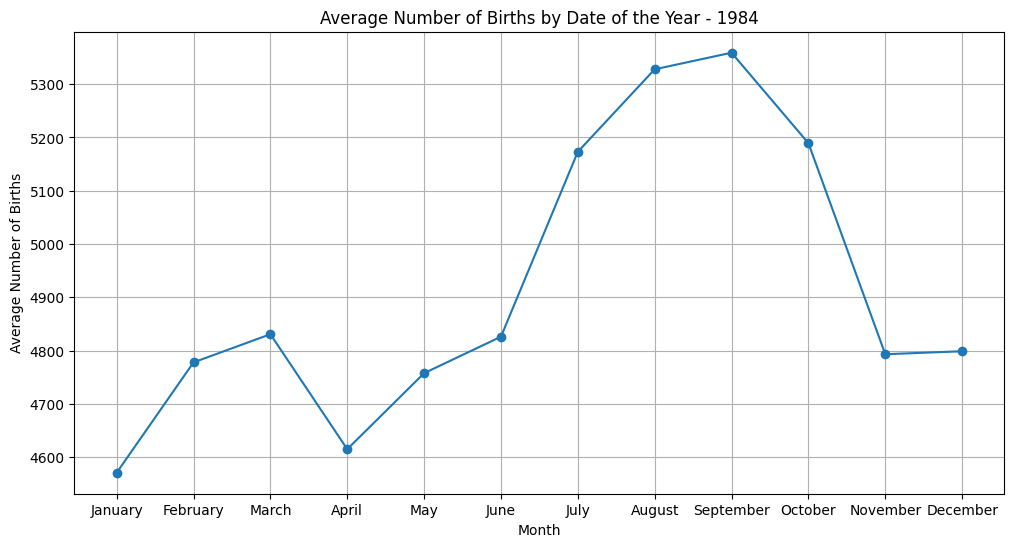

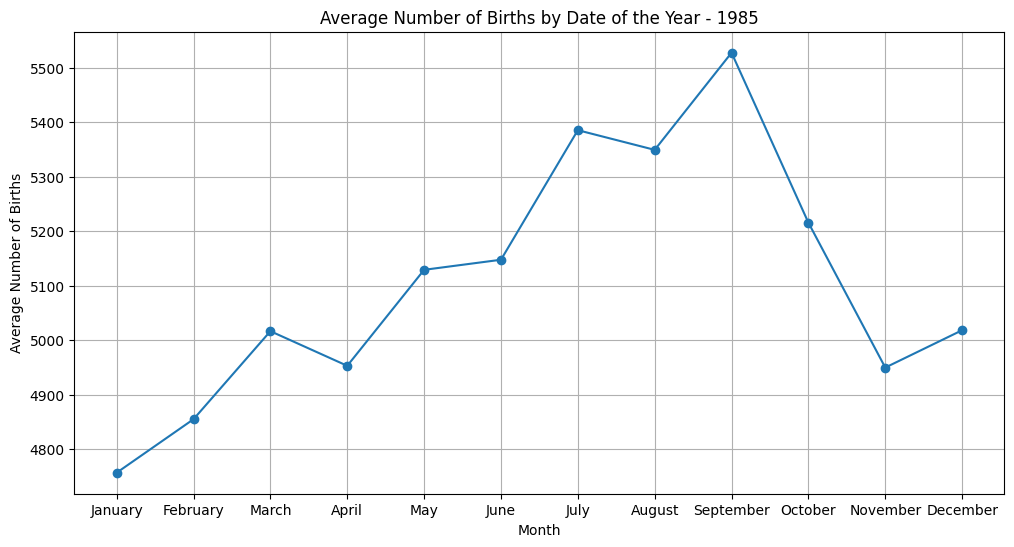

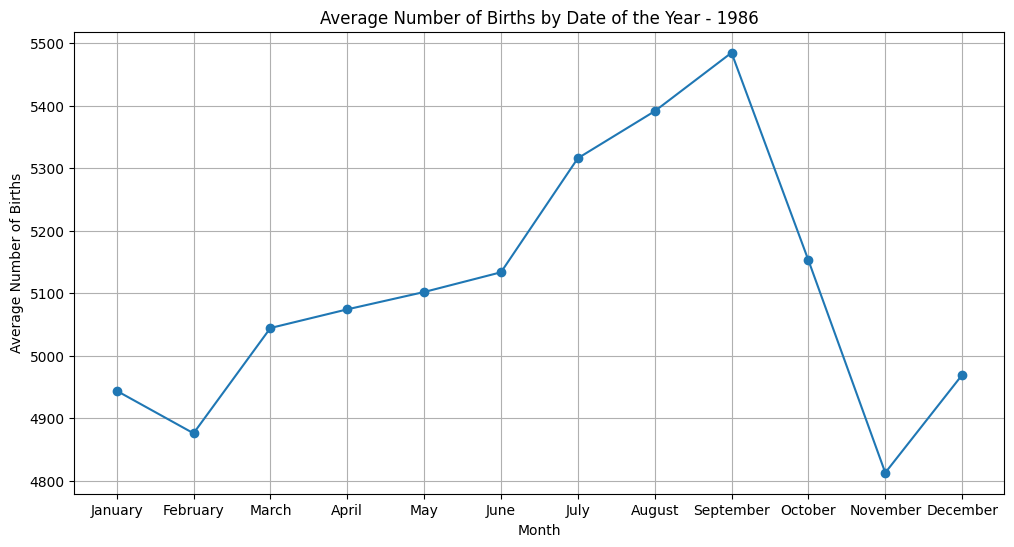

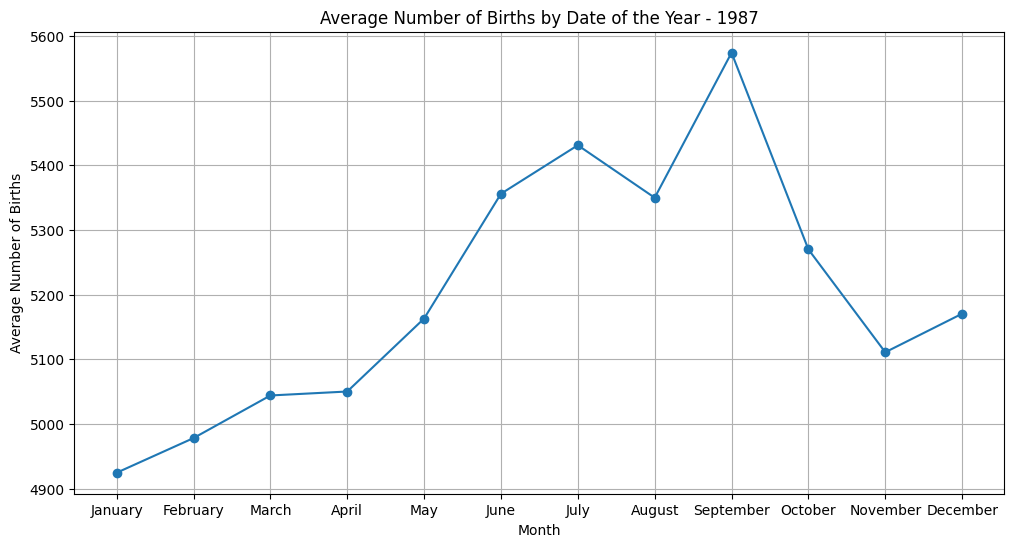

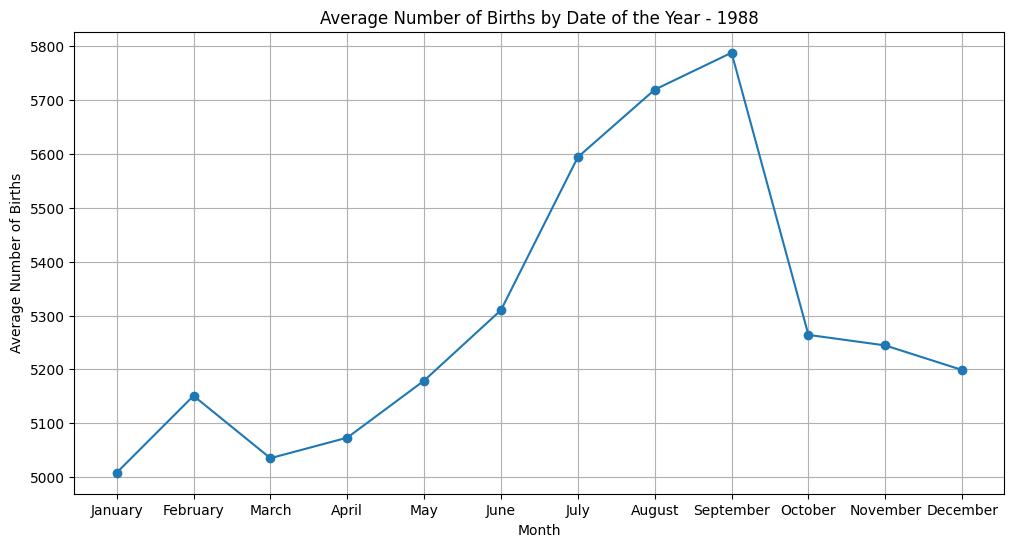

In [112]:
import calendar

# Grouping the data by year and month
grouped_year_month = df.groupby(['year', 'month'])['births'].mean().reset_index()

# Convert grouped_year_month to a DataFrame
grouped_year_month_df = grouped_year_month.rename(columns={'month': 'Month', 'births': 'Avg_Births_Month'})

# Iterate over each year and plot the data
years = grouped_year_month_df['year'].unique()

for year in years:
    # Filter data for the current year
    data_year = grouped_year_month_df[grouped_year_month_df['year'] == year]

    # Plotting the data for the current year
    plt.figure(figsize=(12, 6))
    plt.plot(data_year['Month'], data_year['Avg_Births_Month'], marker='o', linestyle='-')
    plt.title(f'Average Number of Births by Date of the Year - {year}')
    plt.xlabel('Month')
    plt.ylabel('Average Number of Births')
    plt.grid(True)
    plt.xticks(np.arange(1, 13), calendar.month_name[1:13])  # Setting month names as x-axis ticks
    plt.show()


<ipython-input-113-f91ed20c1e0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_day'] = df['month'].astype(str) + '-' + df['day'].astype(str)


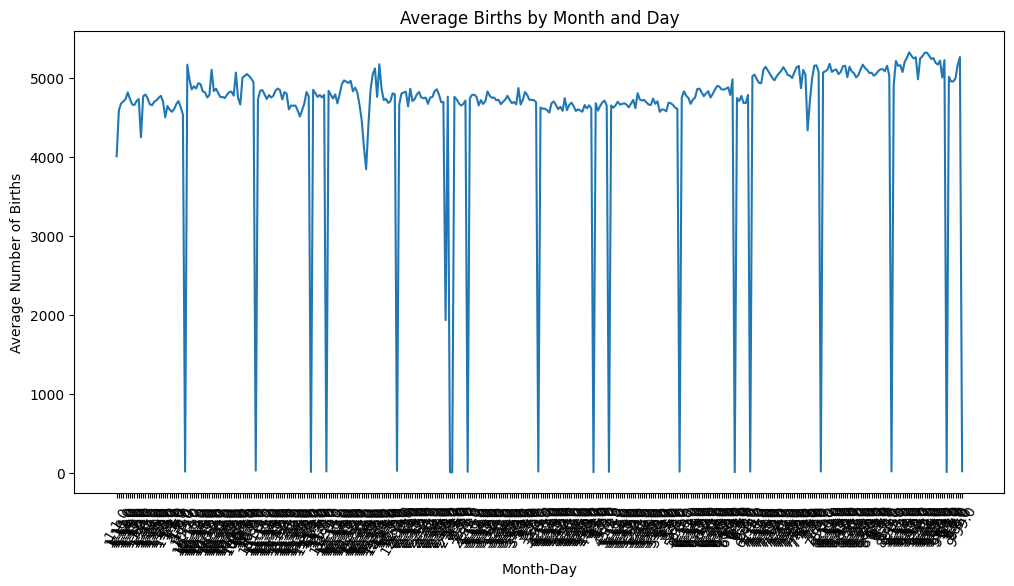

In [113]:
# Create a new column with combined month and day information
df['month_day'] = df['month'].astype(str) + '-' + df['day'].astype(str)

# Group data by month_day and calculate average births
avg_births = df.groupby('month_day')['births'].mean().reset_index()

# Plot the average births by month_day
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_day', y='births', data=avg_births)
plt.title('Average Births by Month and Day')
plt.xlabel('Month-Day')
plt.ylabel('Average Number of Births')
plt.xticks(rotation=60)
plt.show()


<ipython-input-114-f22b009d3f5d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_day'] = df['month'].astype(str) + '-' + df['day'].astype(str)


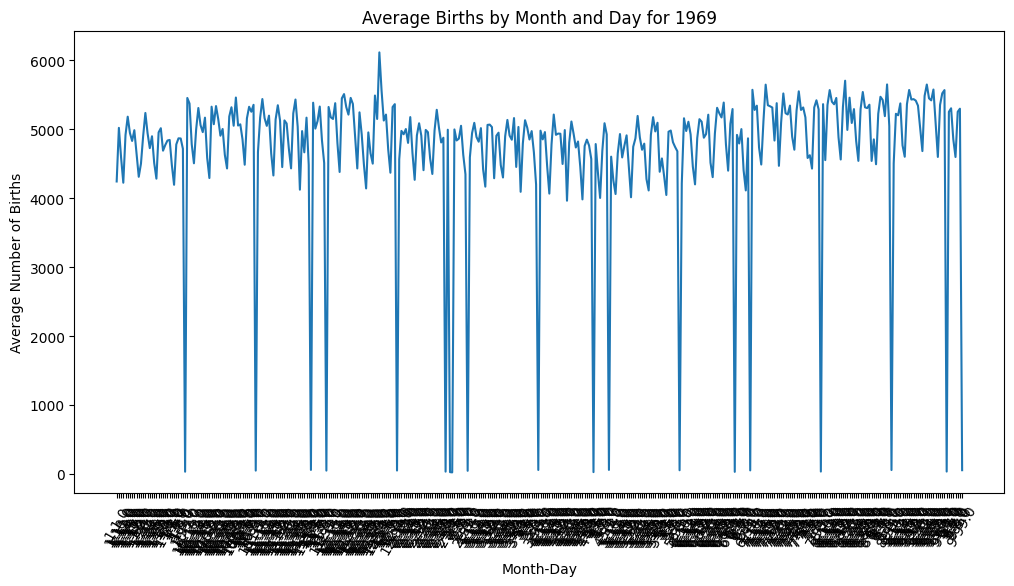

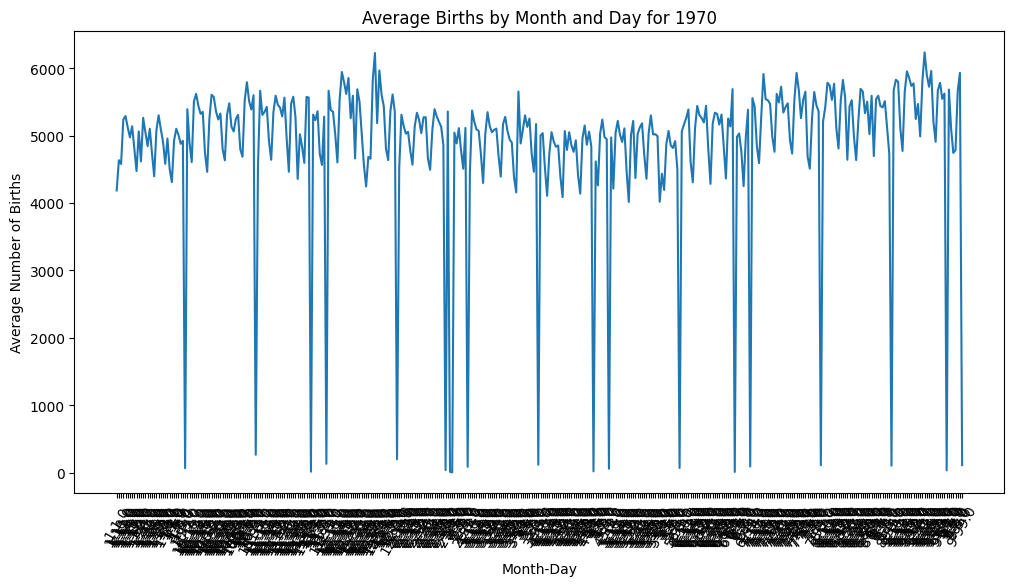

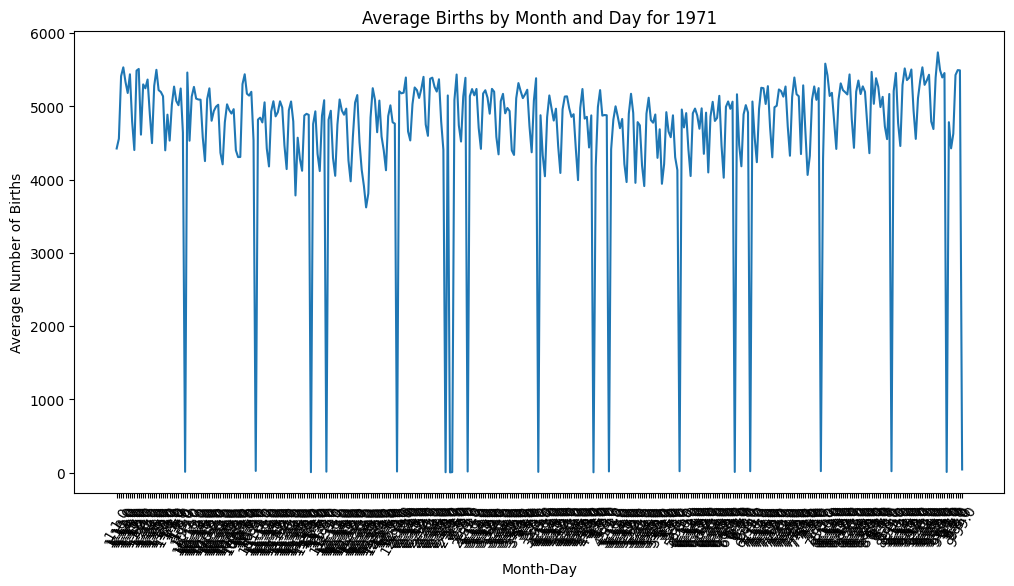

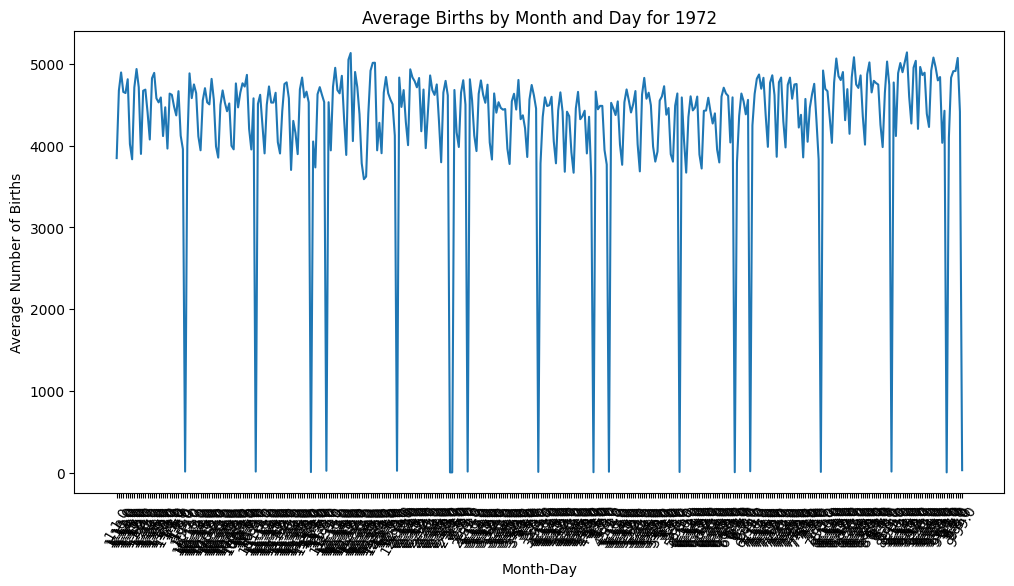

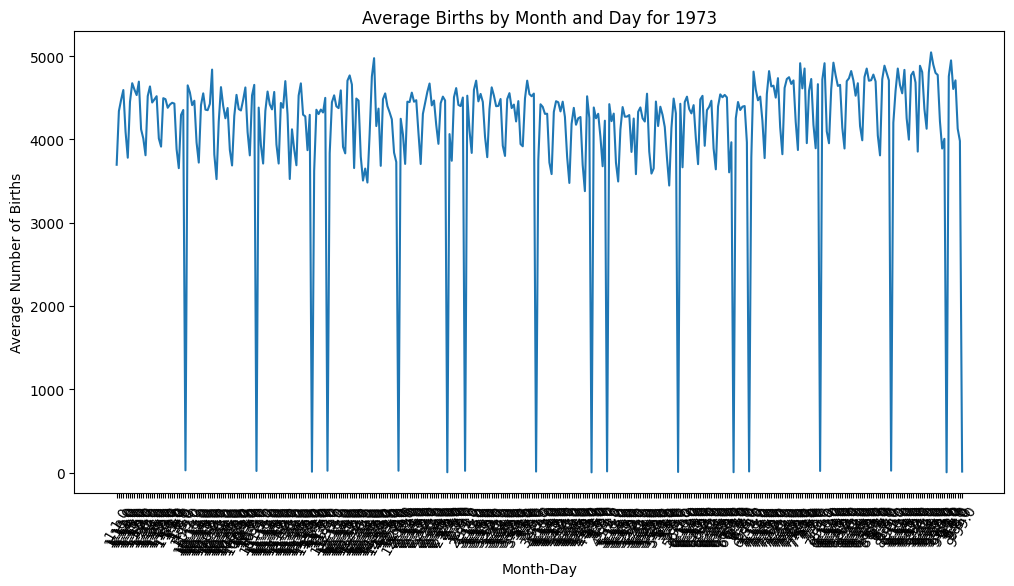

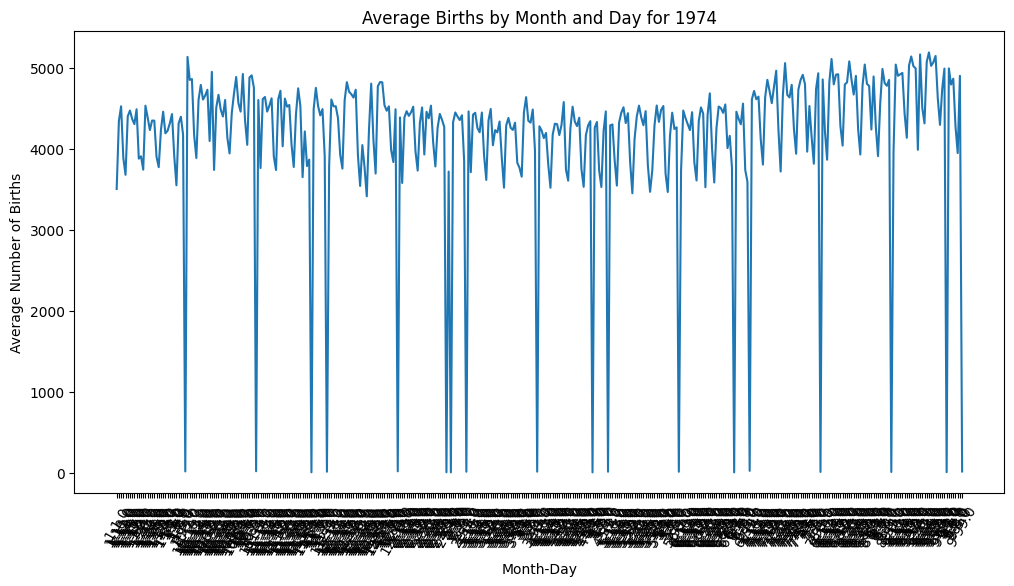

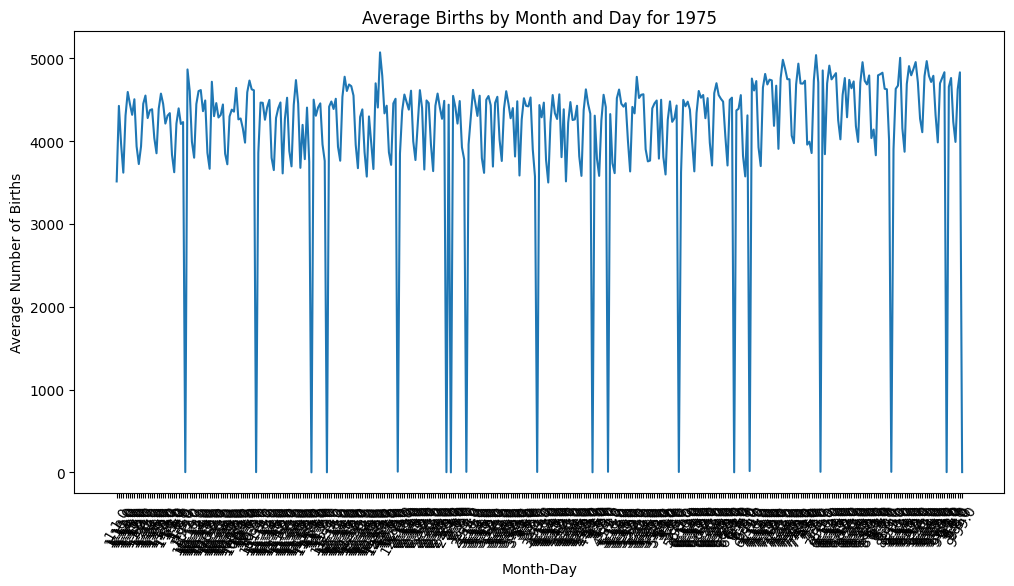

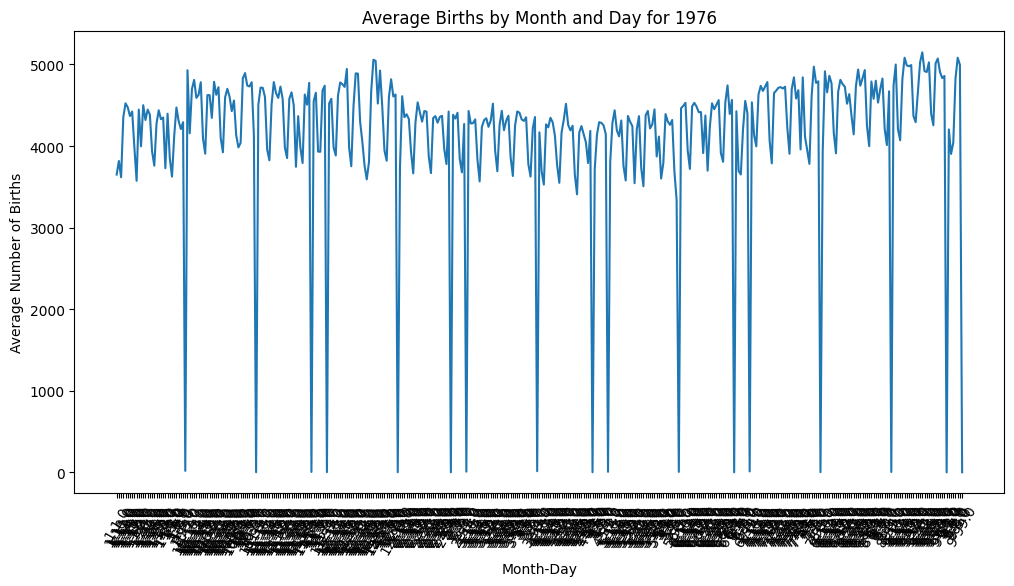

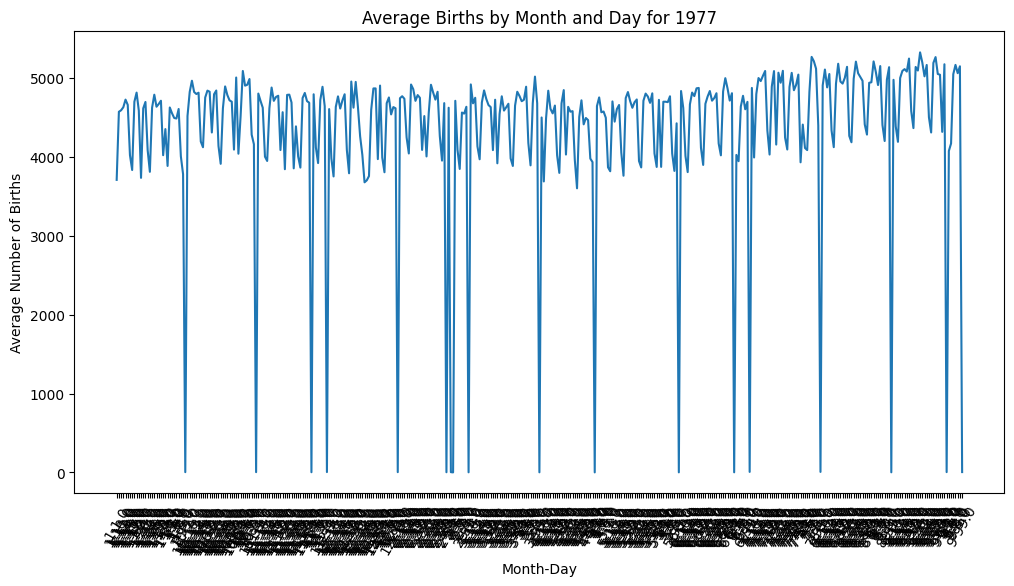

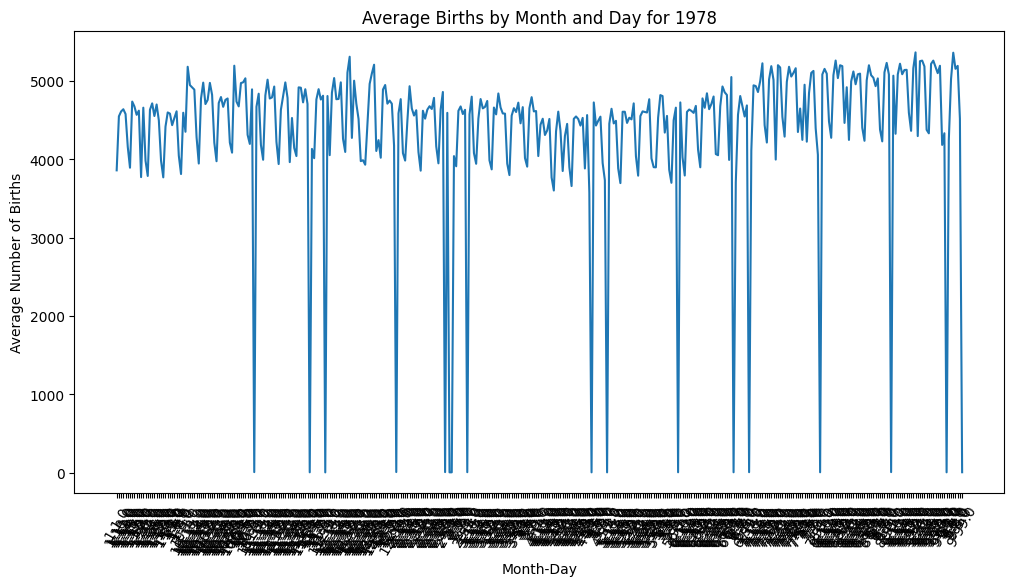

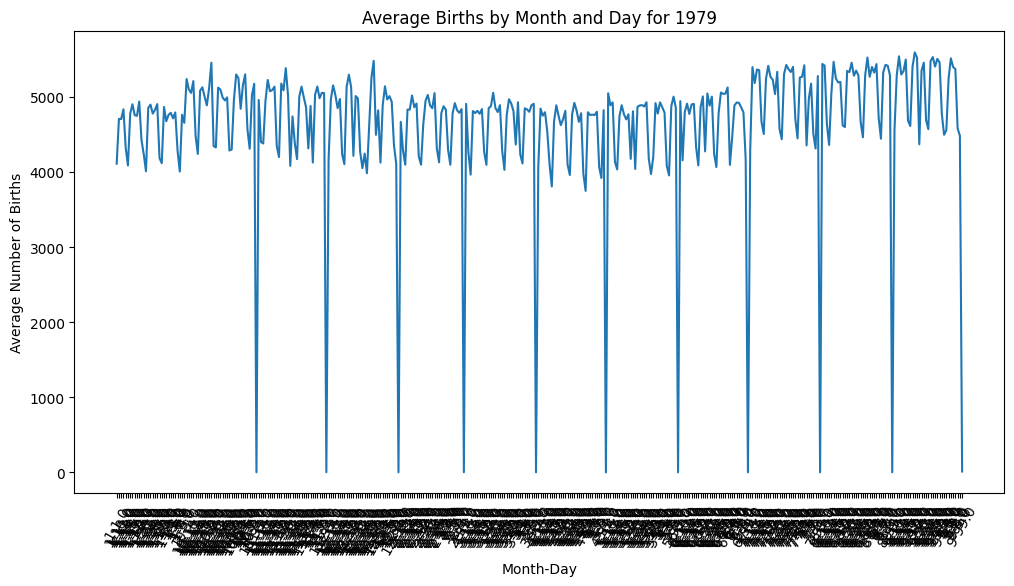

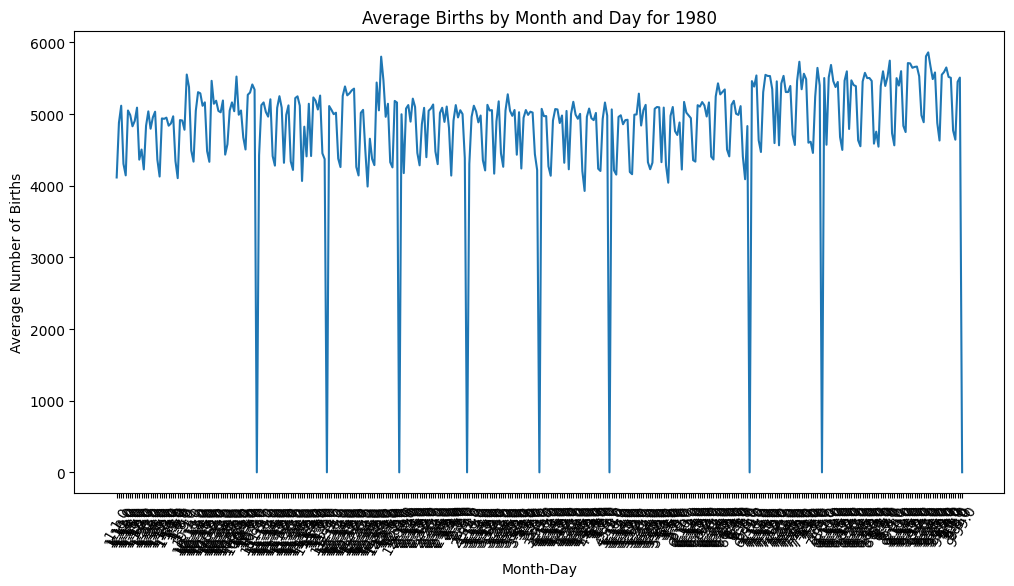

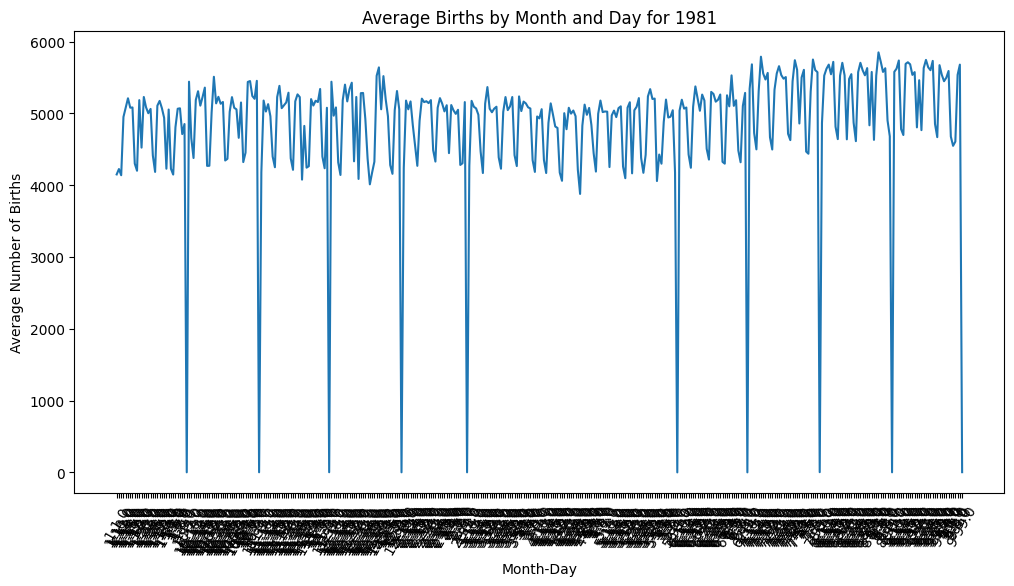

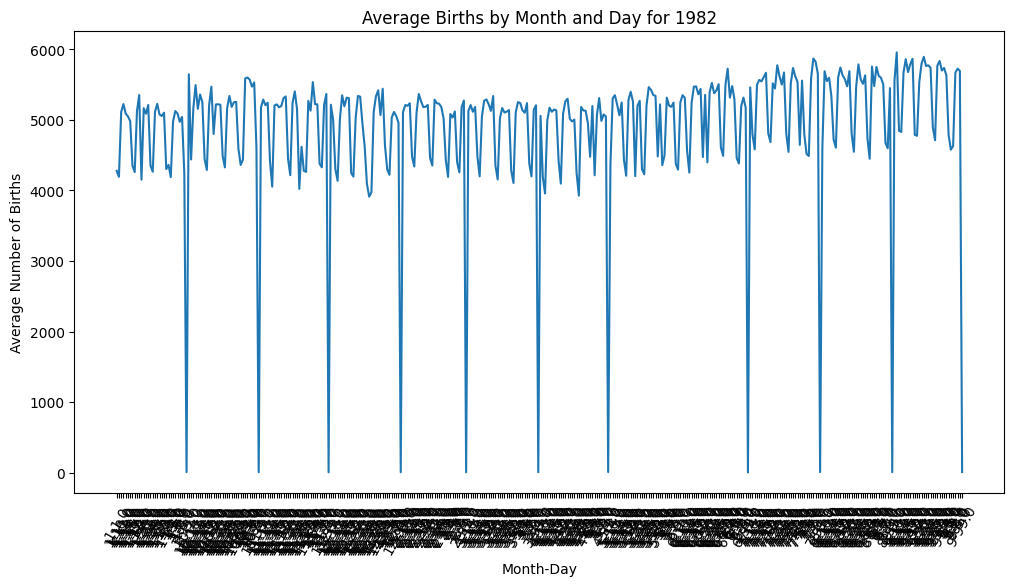

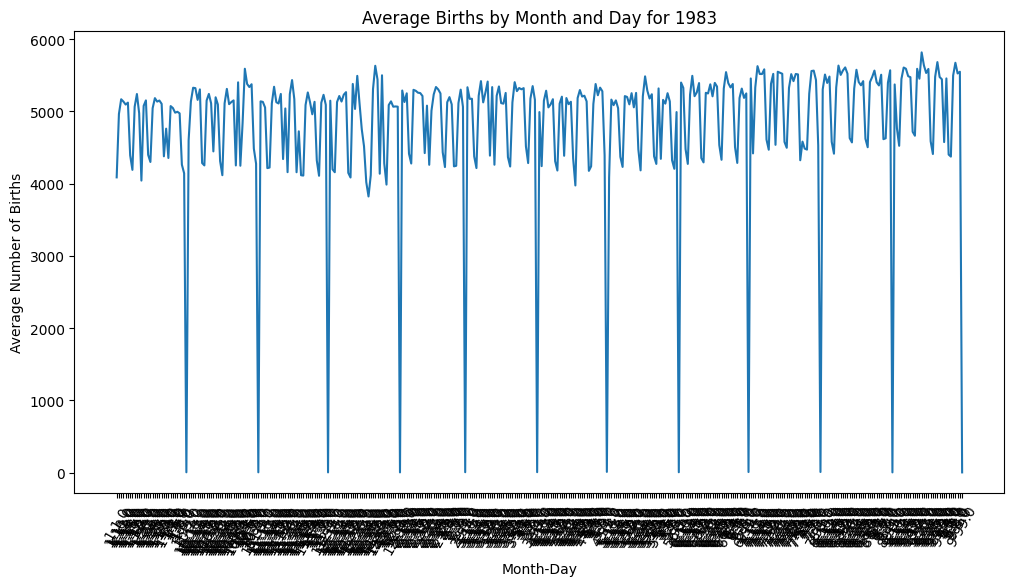

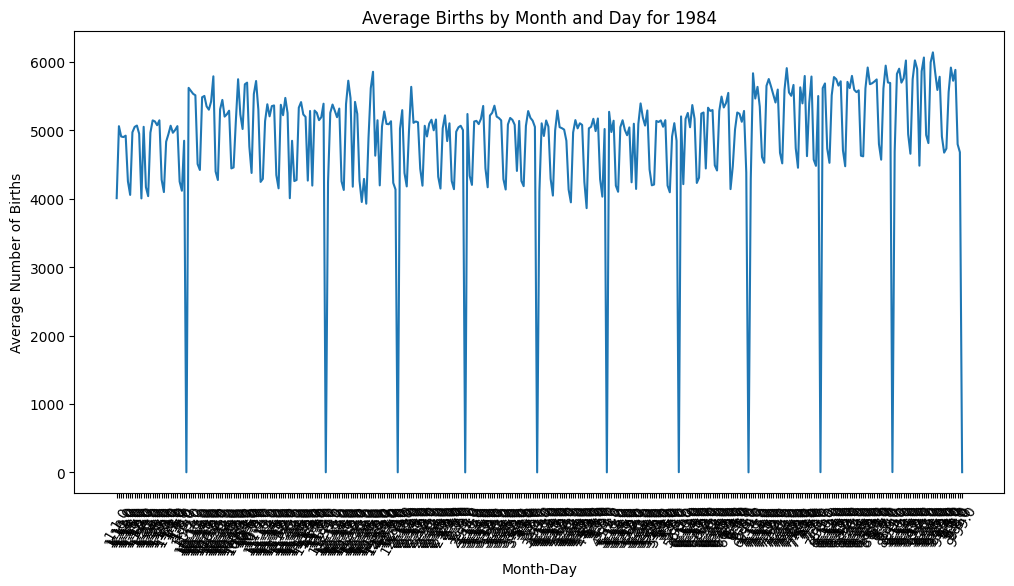

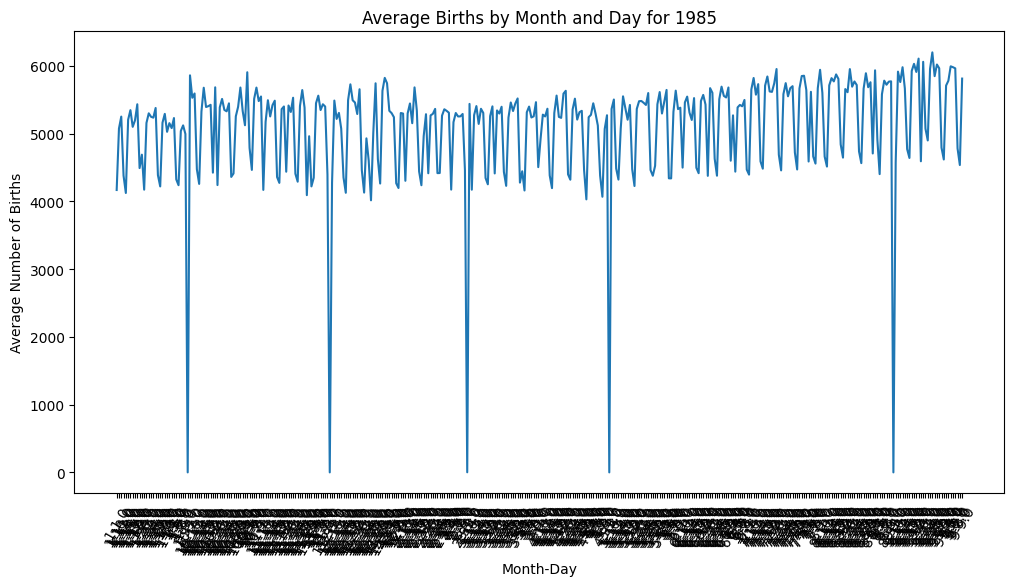

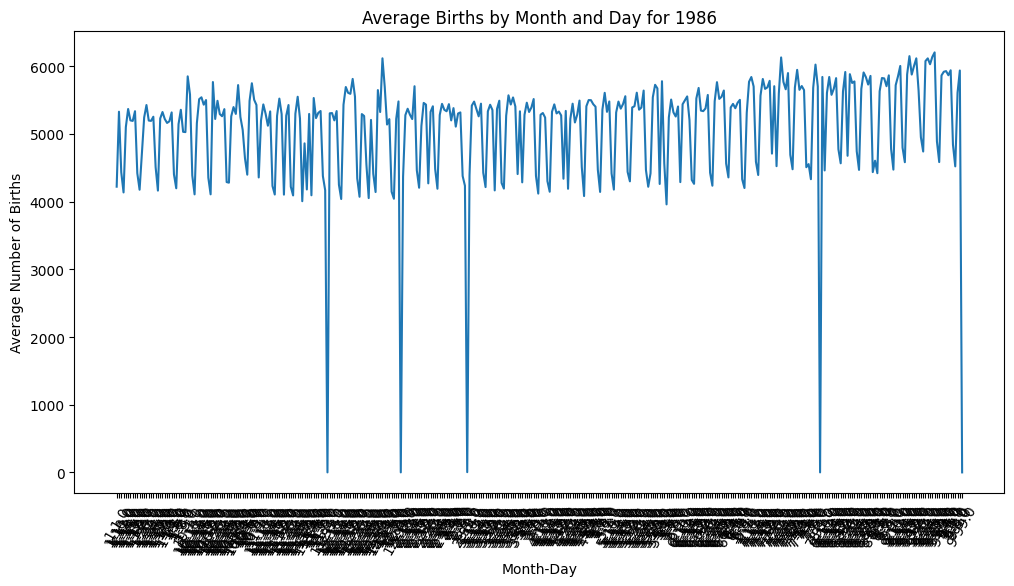

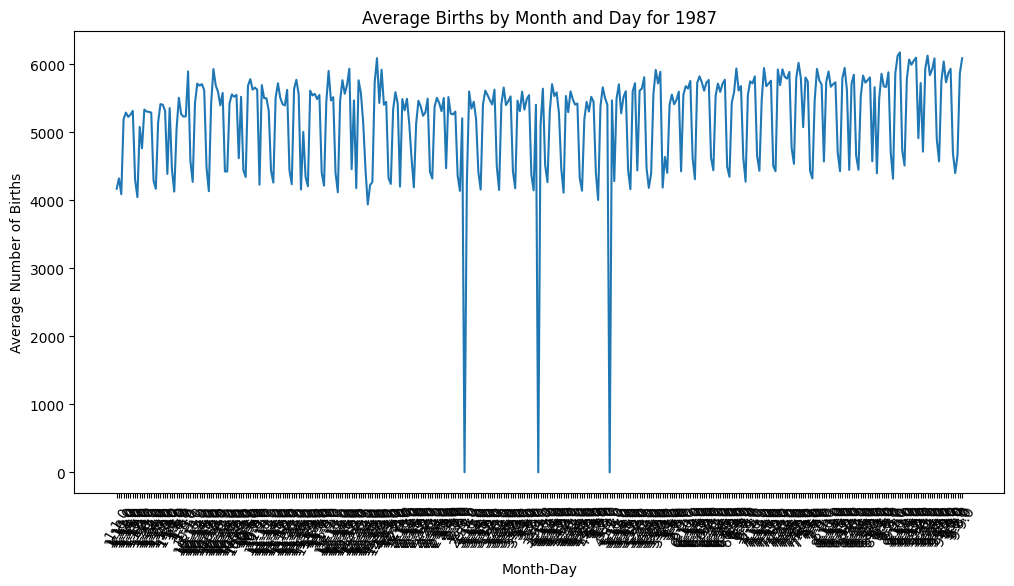

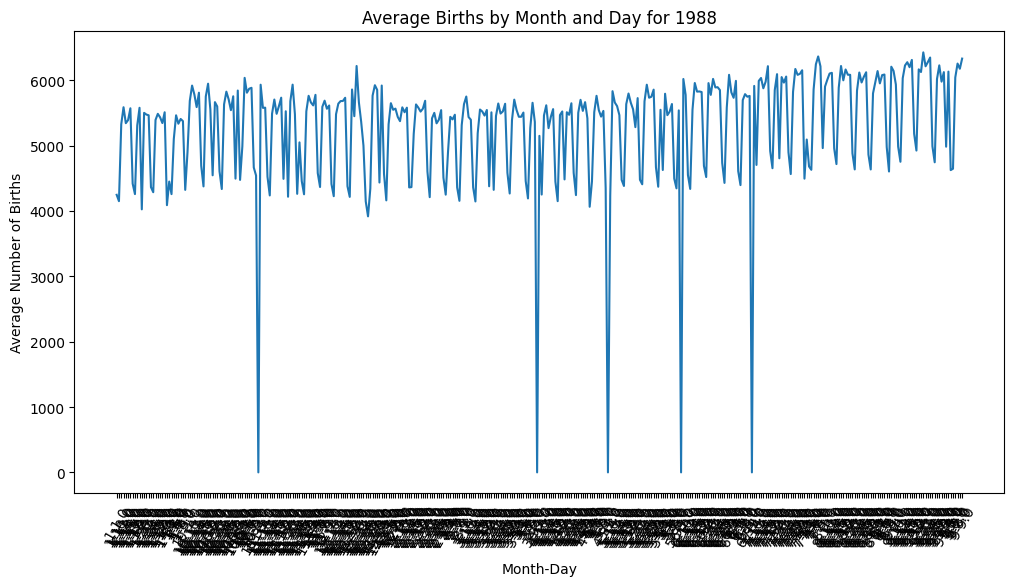

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns 'year', 'month', 'day', and 'births'

# Create a new column with combined month and day information
df['month_day'] = df['month'].astype(str) + '-' + df['day'].astype(str)

# Group data by year, month_day, and calculate average births
avg_births_by_year = df.groupby(['year', 'month_day'])['births'].mean().reset_index()

# Plot the average births by month_day for each year
years = df['year'].unique()
for year in years:
    data_year = avg_births_by_year[avg_births_by_year['year'] == year]
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='month_day', y='births', data=data_year)
    plt.title(f'Average Births by Month and Day for {year}')
    plt.xlabel('Month-Day')
    plt.ylabel('Average Number of Births')
    plt.xticks(rotation=60)
    plt.show()
